# Modern Portfolio Theory
Modern portfolio theory also popularly called as `Mean-Variance Portofolio Theory (MVP)` is a major breakthrough in finance. It is based on the premises that returns are normally distributed and by looking at mean and variance, we can essentialy describe the distribution of end-of-period wealth.

The basic idea of this theory is to achieve diversification by constructuing portfolio for a minimal portfolio risk or maximal portfolio returns given a certain level of risk. Accordingly, the `Efficient Frontier` is a set of optimal portfolios in the risk-return spectrum and portfolios located under the `Efficient Frontier` curve are considered sub-optimal.

This means that the portfolios on the frontier offer

`Highest expected return for a given level of risk`
`Lowest level of risk for a given level of expected returns`
In essence, the investors goal should be to select a level of risk that he/she is comfortable with and then find a portfolio that maximizes returns based on the selected risk level.

In [1]:
# Import base libraries
from numpy import *
from numpy.linalg import multi_dot
import pandas as pd
import yfinance as yf

# Import cufflinks
import cufflinks as cf
cf.set_config_file(
    offline=True, 
    dimensions=((1000,600)),
    theme= 'henanigans')

# Import plotly express for EF plot
import plotly.express as px
px.defaults.template = "plotly_dark"
px.defaults.width = 1000
px.defaults.height = 600

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # FAANG stocklist
# symbols = ['AAPL', 'AMZN', 'MSFT', 'GOOG', 'NFLX' ]

# # Number of assets
# numofasset = len(symbols)

# # Number of portfolio for optimization
# numofportfolio = 5000

In [3]:
# # Fetch data from yahoo finance for last six years
# faangstocks = yf.download(symbols, start='2015-01-01', end='2022-12-31', progress=False)['Adj Close']

# # Verify the output
# faangstocks.tail()

In [4]:
# # Let's save the data for future use
# faangstocks.to_csv('3. Portfolio Optimisation/data/faang_stocks.csv')

In [5]:
# Load locally stored data
df = pd.read_csv('data/faang_stocks.csv', index_col=0, parse_dates=True)

# Check first 5 values 
df.head()

,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2015-01-02 00:00:00-05:00,24.565701,15.4260,26.168653,40.709469,49.848572
2015-01-05 00:00:00-05:00,23.873644,15.1095,25.623152,40.335110,47.311428
2015-01-06 00:00:00-05:00,23.875885,14.7645,25.029282,39.743107,46.501431
2015-01-07 00:00:00-05:00,24.210682,14.9210,24.986401,40.248039,46.742859
2015-01-08 00:00:00-05:00,25.140913,15.0230,25.065184,41.432064,47.779999


Descriptive Statistics

In [6]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
AAPL,2014.0,71.284846,49.429077,20.883032,29.361794,46.299198,122.232388,180.683884
AMZN,2014.0,88.298323,49.962144,14.347500,40.925875,86.978500,127.878502,186.570496
GOOG,2014.0,67.901388,34.276966,24.560070,39.901001,56.965250,88.430124,150.709000
MSFT,2014.0,138.339542,89.410584,35.172424,57.597827,105.026615,217.942764,339.075592
NFLX,2014.0,287.268426,162.132491,45.547142,128.992493,288.284988,381.657501,691.690002


In [7]:
df

,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2015-01-02 00:00:00-05:00,24.565701,15.426000,26.168653,40.709469,49.848572
2015-01-05 00:00:00-05:00,23.873644,15.109500,25.623152,40.335110,47.311428
2015-01-06 00:00:00-05:00,23.875885,14.764500,25.029282,39.743107,46.501431
2015-01-07 00:00:00-05:00,24.210682,14.921000,24.986401,40.248039,46.742859
2015-01-08 00:00:00-05:00,25.140913,15.023000,25.065184,41.432064,47.779999
...,...,...,...,...,...
2022-12-23 00:00:00-05:00,131.658981,85.250000,89.809998,238.133545,294.959991
2022-12-27 00:00:00-05:00,129.831772,83.040001,87.930000,236.367981,284.170013
2022-12-28 00:00:00-05:00,125.847855,81.820000,86.459999,233.944031,276.880005


Visualize Data

In [8]:
# Plot price history
df.iloc[1200:,:].normalize().iplot(kind='line', title='Normalized Price Plot')

Calculate Returns

In [9]:
# Calculate returns 
returns = df.pct_change().fillna(0)
returns.head()

,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2015-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05 00:00:00-05:00,-0.028172,-0.020517,-0.020846,-0.009196,-0.050897
2015-01-06 00:00:00-05:00,0.000094,-0.022833,-0.023177,-0.014677,-0.017121
2015-01-07 00:00:00-05:00,0.014022,0.010600,-0.001713,0.012705,0.005192
2015-01-08 00:00:00-05:00,0.038422,0.006836,0.003153,0.029418,0.022188


# Annualized Returns
In MVP, the average returns play an important role as they are used to approximate the expected returns.

In [10]:
# Calculate annual returns
annual_returns = (returns.mean() * 252)
annual_returns

AAPL    0.253133
AMZN    0.267211
GOOG    0.192799
MSFT    0.261251
NFLX    0.328999
dtype: float64

In [14]:
# Plot annualized return and volatility
pd.DataFrame({
    'Annualized Return' : round(returns.mean() * 252 * 100,2),
    'Annualized Volatility': round(returns.std()*sqrt(252) * 100,2)
}).iplot(kind='bar', title='Annualized Return & Volatility (%)', shared_xaxes = True, subplots=True)

Annualized Volatilities

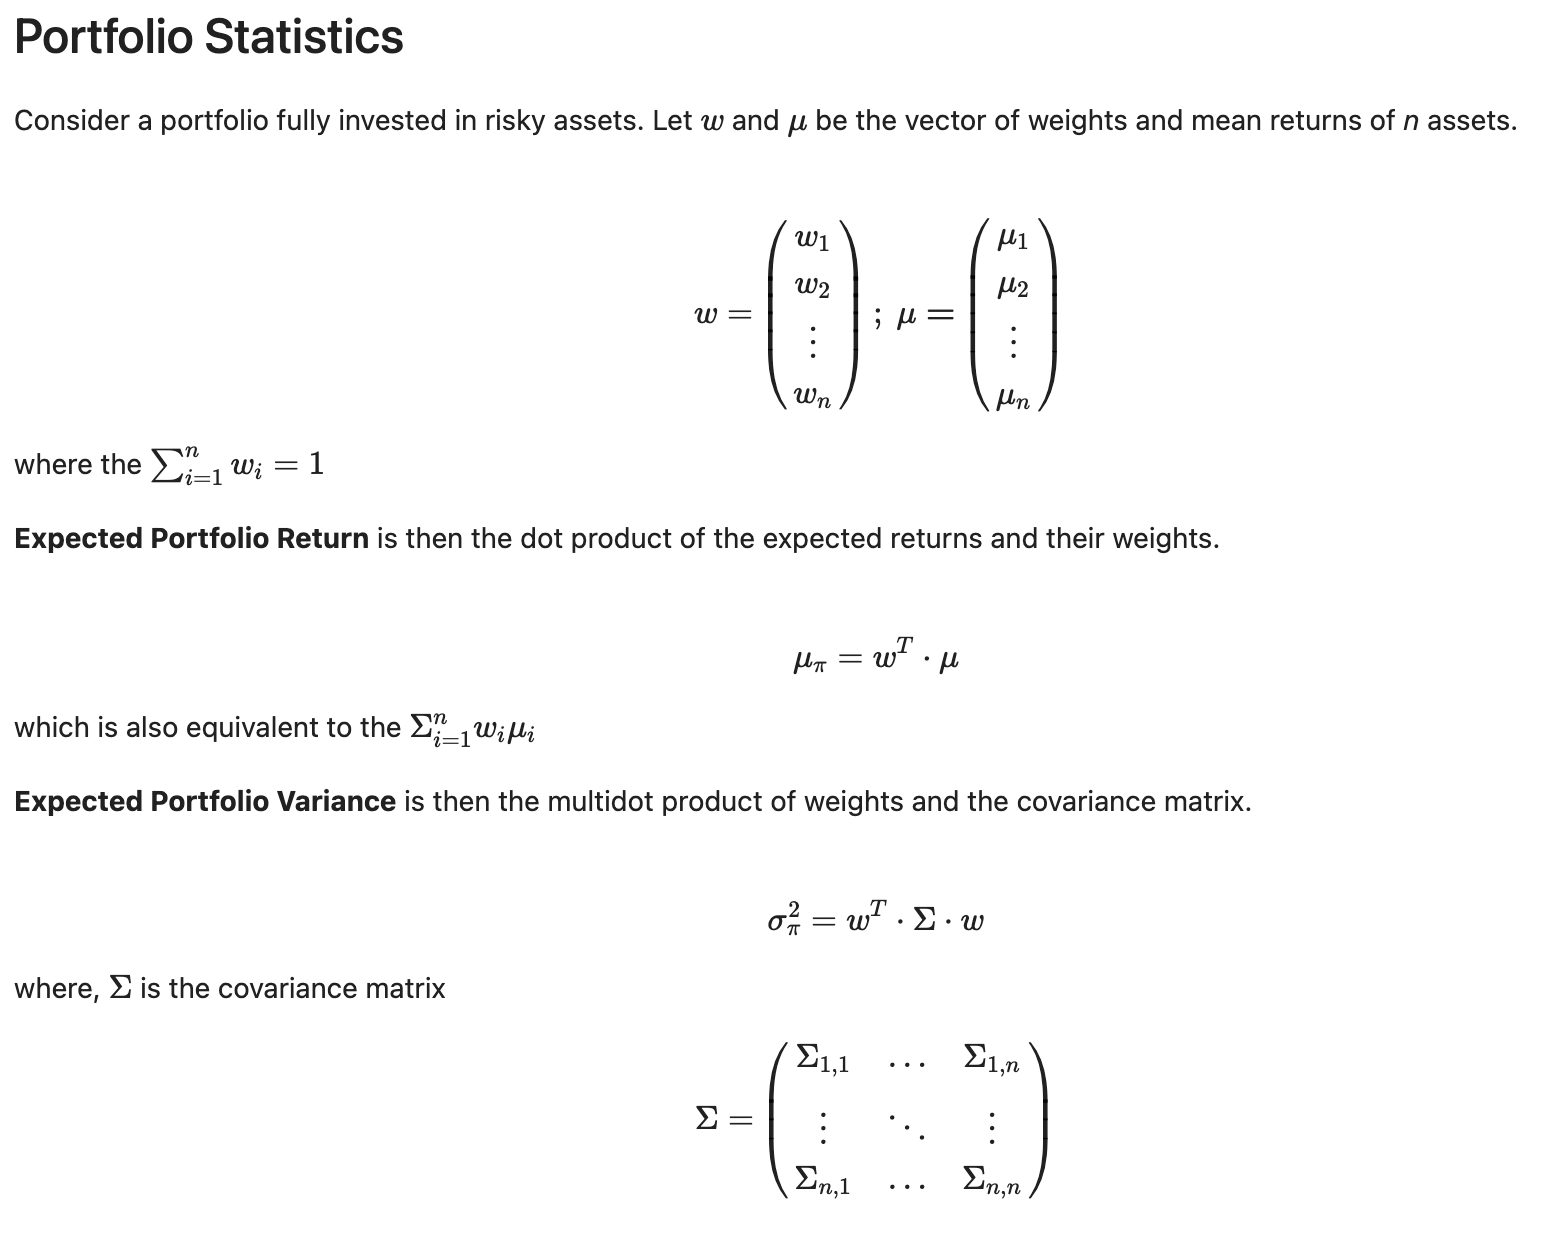

# Equal Weighted Portfolio
Assume a portoflio composed of all five stocks with equal weighting. We will now calculate the portfolio statistics.

In [15]:
# wts = numofasset * [1./numofasset]
wts = 5 * [1./5]
array(wts).shape

(5,)

In [16]:
# Reshape
# wts = numofasset * [1./numofasset]
wts = array(wts)[:,newaxis]
wts

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [17]:
# Check shape
wts.shape

(5, 1)

In [18]:
# Derive returns
ret = array(returns.mean() * 252)[:,newaxis]      
ret

array([[0.25313285],
       [0.26721054],
       [0.19279939],
       [0.26125054],
       [0.32899927]])

In [19]:
# Portfolio returns
wts.T @ ret 

array([[0.26067852]])

In [20]:
# Portfolio Variance & Volatility
cov = returns.cov() * 252
var = multi_dot([wts.T, cov, wts])
sqrt(var)

array([[0.26917587]])

# Portfolio Simulation
Now, we will implement a Monte Carlo simulation to generate random portfolio weights on a larger scale and calculate the expected portfolio return, variance and sharpe ratio for every simulated allocation. We will then identify the portfolio with a highest return for per unit of risk.

In [23]:
def portfolio_simulation(returns):

    # Initialize the lists
    rets = []; vols = []; wts = []

    # Simulate 5,000 portfolios
    numofportfolio = 50000
    numofasset = 5
    for i in range (numofportfolio):
        
        # Generate random weights
        weights = random.random(numofasset)[:, newaxis]
        
        # Set weights such that sum of weights equals 1
        weights /= sum(weights)
        
        # Portfolio statistics
        rets.append(weights.T @ array(returns.mean() * 252)[:, newaxis])        
        vols.append(sqrt(multi_dot([weights.T, returns.cov()*252, weights])))
        wts.append(weights.flatten())

    # Create a dataframe for analysis
    portdf = 100*pd.DataFrame({
        'port_rets': array(rets).flatten(),
        'port_vols': array(vols).flatten(),
        'weights': list(array(wts))
        })
    
    portdf['sharpe_ratio'] = portdf['port_rets'] / portdf['port_vols']

    return round(portdf,2)

In [24]:
# Create a dataframe for analysis
temp = portfolio_simulation(returns)
temp.head()

,port_rets,port_vols,weights,sharpe_ratio
0,27.55,29.00,"[18.155311089337587, 7.35007787443943, 14.0715...",0.95
1,26.14,26.95,"[42.056393742071265, 12.156613265062305, 15.22...",0.97
2,25.39,27.53,"[10.758325913182256, 39.6270590575172, 26.9049...",0.92
3,27.06,27.07,"[29.423334018700924, 20.455101779950454, 3.628...",1.00
4,26.31,28.04,"[22.521866773791917, 18.055293028824572, 24.53...",0.94


In [25]:
# Get the max sharpe portfolio stats
temp.iloc[temp.sharpe_ratio.idxmax()]

port_rets                                                   26.92
port_vols                                                   26.75
weights         [25.316350489282485, 11.799404899491673, 4.075...
sharpe_ratio                                                 1.01
Name: 224, dtype: object

In [26]:
# Verify the above result
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
port_rets,50000.0,26.063431,1.231208,20.46,25.24,26.07,26.87,31.41
port_vols,50000.0,27.489690,1.367452,25.63,26.49,27.20,28.15,40.40
sharpe_ratio,50000.0,0.948643,0.029155,0.75,0.93,0.95,0.97,1.01


In [27]:
# Plot simulated portfolio
fig = px.scatter(
    temp, x='port_vols', y='port_rets', color='sharpe_ratio', 
    labels={'port_vols': 'Expected Volatility', 'port_rets': 'Expected Return','sharpe_ratio': 'Sharpe Ratio'},
    title="Monte Carlo Simulated Portfolio"
     ).update_traces(mode='markers', marker=dict(symbol='cross'))

# Plot max sharpe 
fig.add_scatter(
    mode='markers', 
    x=[temp.iloc[temp.sharpe_ratio.idxmax()]['port_vols']], 
    y=[temp.iloc[temp.sharpe_ratio.idxmax()]['port_rets']], 
    marker=dict(color='RoyalBlue', size=20, symbol='star'),
    name = 'Max Sharpe'
).update(layout_showlegend=False)

# Show spikes
fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)
fig.show()